In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-dataset/advertising.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)


In [3]:
df = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

In [4]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

# Check the normanality of Data 

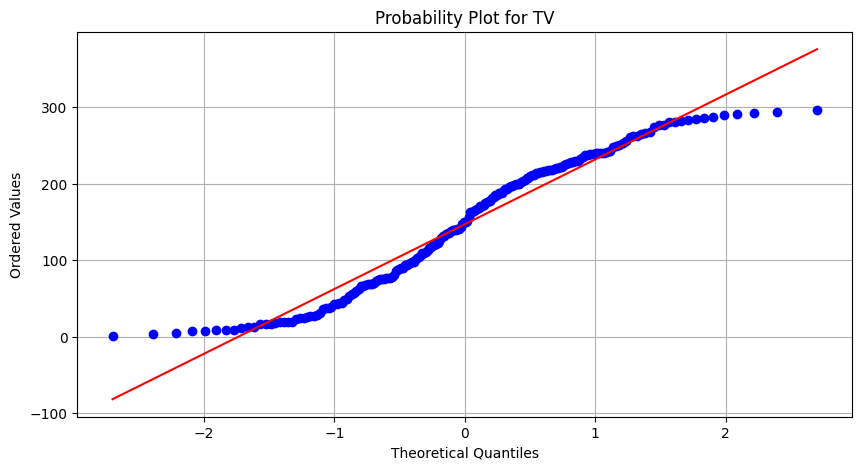

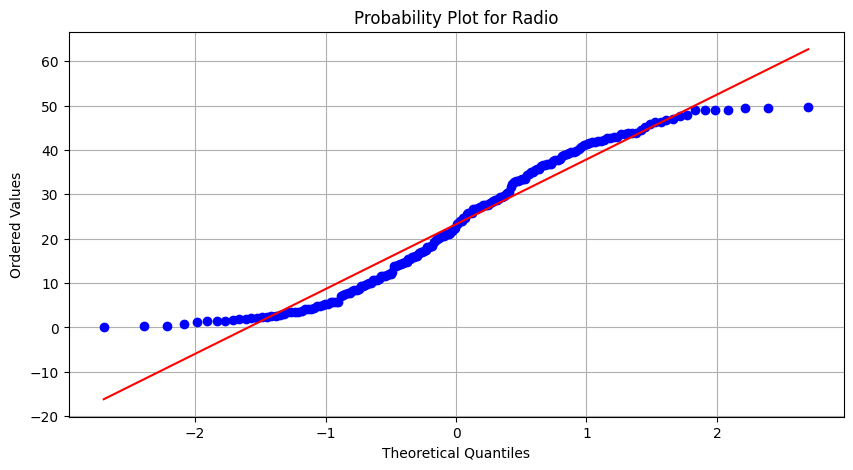

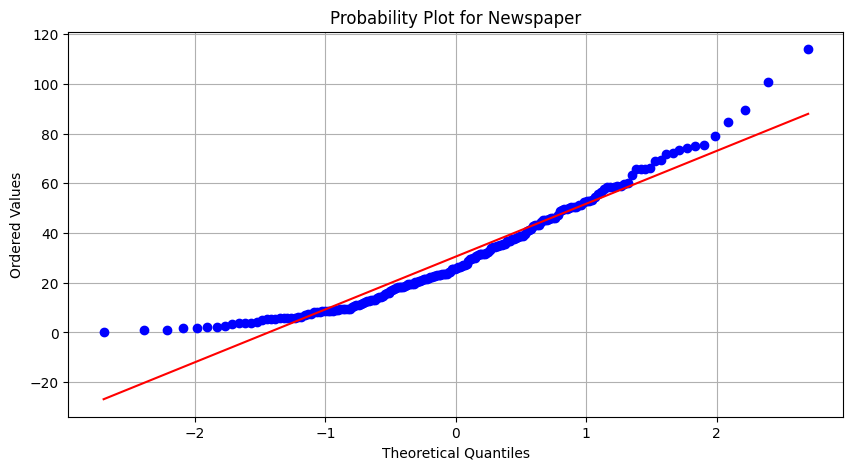

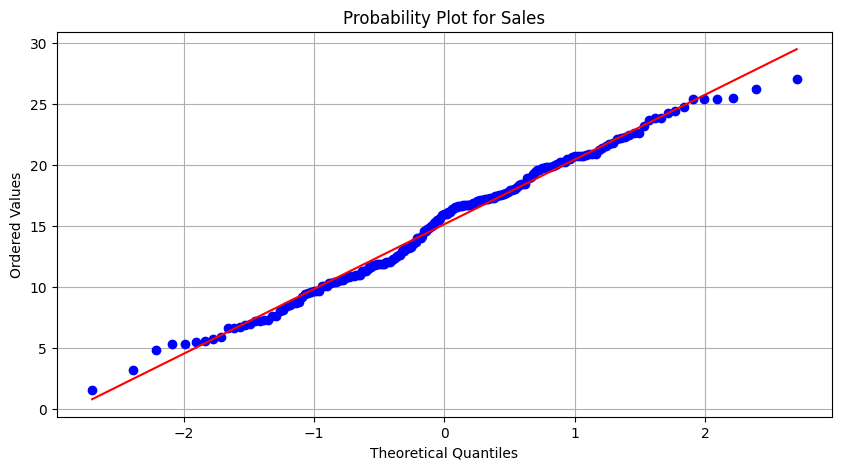

In [7]:
for column in df.columns:
    plt.figure()  # Create a new figure for each column
    stats.probplot(df[column], plot=plt)
    plt.title(f'Probability Plot for {column}')  # Set title with column name
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show() 

# WE also apply the Shapiro wilk test for checking the normanality of DATA

In [8]:
for column in df.columns:
    stat, p_value = stats.shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}")

Shapiro-Wilk test for TV: Statistic=0.9495095014572144, p-value=1.692740511316515e-06
Shapiro-Wilk test for Radio: Statistic=0.9440046548843384, p-value=5.196915822125447e-07
Shapiro-Wilk test for Newspaper: Statistic=0.9363999962806702, p-value=1.1272206990042832e-07
Shapiro-Wilk test for Sales: Statistic=0.98752361536026, p-value=0.07643628120422363


In [9]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

<Axes: >

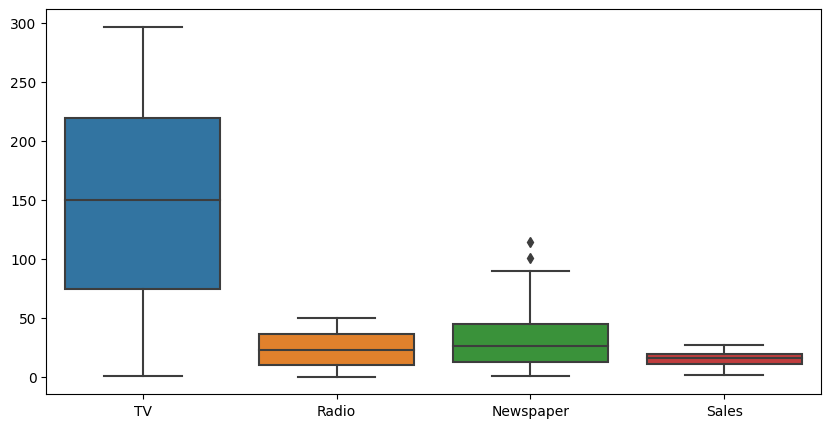

In [10]:
sns.boxplot(data=df)

# Newspaper feature has outliers 

<Axes: ylabel='Newspaper'>

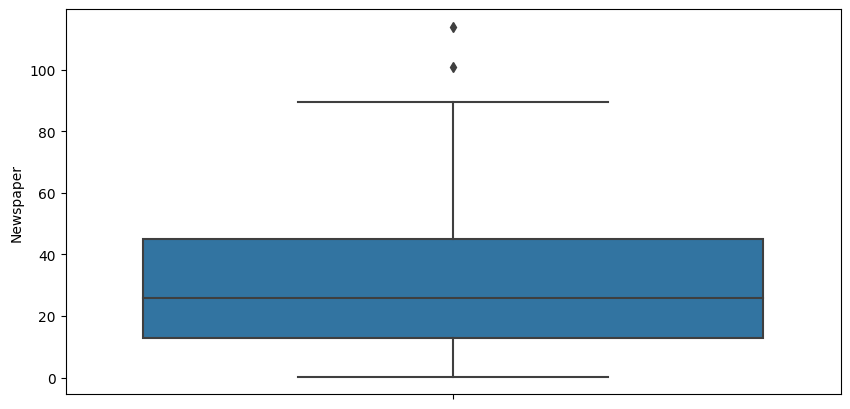

In [11]:
sns.boxplot( y=df["Newspaper"] )

# Now we remove the outlier by Standered Deviation 

In [12]:
mean = df.Newspaper.mean()
mean

30.553999999999995

In [13]:
std_deviation = df.Newspaper.std()
std_deviation

21.778620838522826

In [14]:
mean+ 3*std_deviation

95.88986251556847

In [15]:
df[df.Newspaper > 95.88986251556847]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


# Remove the these two outlier 

In [16]:
rows_drop = df[df['Newspaper'] > 95.88986251556847]

# Drop the filtered rows
df.drop(rows_drop.index, inplace=True)

In [17]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<Axes: ylabel='Newspaper'>

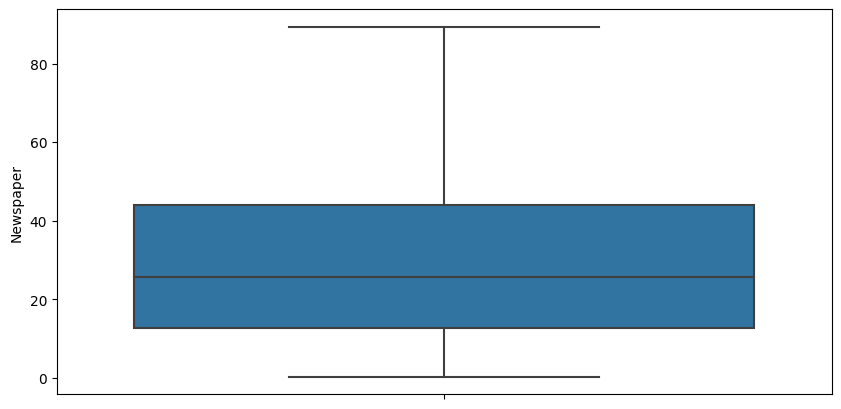

In [18]:
sns.boxplot( y=df["Newspaper"] )

### Now you cake see the oulier is remove 

# Linear Rigression for sale prediction by TV ads 

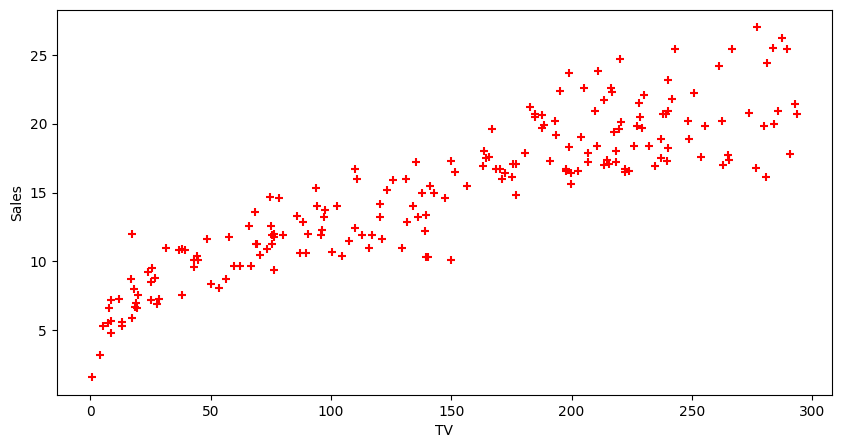

In [19]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(df.TV,df.Sales,color='red',marker='+')

In [20]:
from sklearn import linear_model

In [21]:
reg = linear_model.LinearRegression()
reg.fit(df[['TV']] ,df.Sales)

LinearRegression()

# Linear Regression Model line 

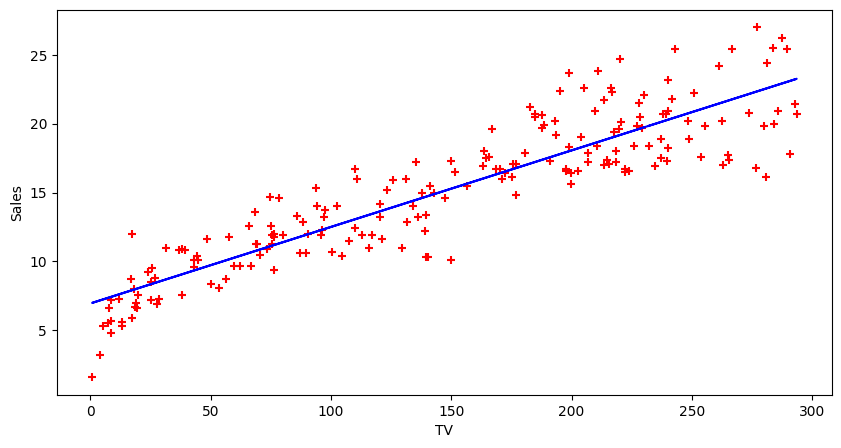

In [22]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(df.TV,df.Sales,color='red',marker='+')
plt.plot(df.TV,reg.predict(df[['TV']]),color = 'blue')

In [23]:
reeg =reg.predict([[44.5]])
print('Sales Prediction By TV ads',reeg,)

Sales Prediction By TV ads [9.42635326]


In [24]:
reeg =reg.predict([[20.25]])
print('Sales Prediction By TV ads',reeg,)

Sales Prediction By TV ads [8.07995822]


### That is not good aproch you can see it 

#  Now we apply Multiregression

In [25]:
reg = linear_model.LinearRegression()
reg.fit(df[['TV','Radio','Newspaper']] ,df.Sales)

LinearRegression()

In [26]:
# Home Sales on bases [[TV,Radio,Newspaper]]
reeg =reg.predict([[151.5,41.3,58.5]])
print('Sales',reeg,)

Sales [17.32981809]


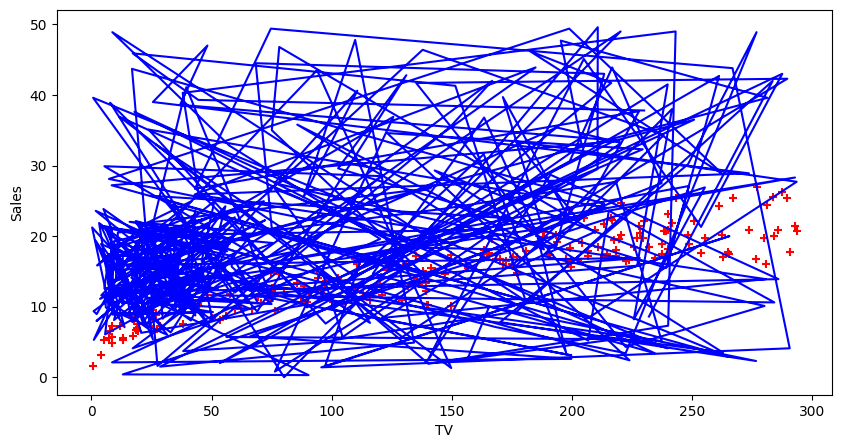

In [27]:
%matplotlib inline
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(df.TV,df.Sales,color='red',marker='+')
plt.plot(df.TV,df.Radio,df.Newspaper,reg.predict(df[['TV','Radio','Newspaper']]),color = 'blue')

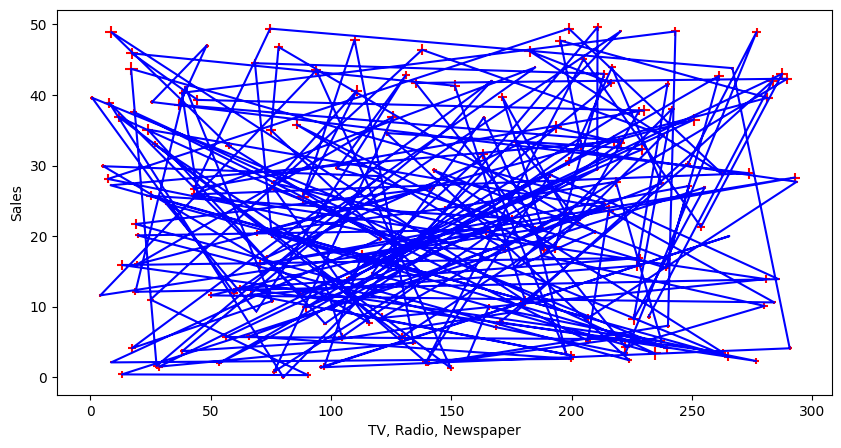

In [28]:
%matplotlib inline

plt.xlabel('TV, Radio, Newspaper')
plt.ylabel('Sales')
plt.scatter(df.TV, df.Radio, s=df.Newspaper, c='red', marker='+')  # Using 's' parameter for marker size
plt.plot(df.TV, df.Radio, color='blue')  # Only plotting TV vs Radio, Newspaper is not used in the plot
plt.show()

In [29]:
# Sales on bases [[TV,Radio,Newspaper]] ads
reeg =reg.predict([[15.5,40.55,55.23]])
print('Sales',reeg,)

Sales [9.82875381]


In [30]:
from sklearn.metrics import r2_score

# Assuming df is your DataFrame containing the data
# Assuming reg is a trained Linear Regression model


# Make predictions
reeg = reg.predict([[151.5, 41.3, 58.5]])

# Print predicted sales
print('Predicted Sales:', reeg)

# Calculate R-squared score
# Assuming df.Sales contains the true sales values
true_sales = df.Sales  # Replace this with your true sales values
r_squared = r2_score(true_sales, reg.predict(df[['TV', 'Radio', 'Newspaper']]))
print('R-squared score:', r_squared)

Predicted Sales: [17.32981809]
R-squared score: 0.9012858186486178


# This is More Accurate Result